In [2]:
import pandas as pd
import os
import datetime
from os import listdir
from os.path import isfile, join
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def read_csv(path):
    date_ = None
    with open(path) as f:
        first_line = f.readline()
        date_= first_line.split()[4]

    col_names= 'lane veh_type aux date 20 30 40 50 65 80 90 100 110 120 130 140 150 160 236'.split()
    
    dtypes = {'lane': 'str', 
              'veh_type': 'str', 
              'aux': 'str', 
              'date': 'str'}

    df = pd.read_csv(path, 
                     index_col=False,
                     skiprows=6, 
                     sep=' ', 
                     names=col_names, 
                     dtype= dtypes)

    df['lane'] = df['lane'].astype(str)
    df['veh_type'] = df['veh_type'].astype(str)
    df['aux'] = df['aux'].astype(str)
    df['date'] = df['date'].astype(str)
    for c in '20 30 40 50 65 80 90 100 110 120 130 140 150 160 236'.split():
        df[c] = pd.to_numeric(df[c], errors='coerce')
    
    df=df.fillna(0)
    
    def set_timestamp(x):
        try:
            if x.startswith('24'):
                x = '00'+x[2:]
                d= datetime.datetime.strptime(date_ +' '+ x, "%m%d%y %H%M")
                days_added = datetime.timedelta(days = 1)
                return d + days_added
            else:
                final_date= datetime.datetime.strptime(date_ +' '+ x, "%m%d%y %H%M") 
                return final_date
        except:
            return np.nan

    df['date']= df['date'].apply(set_timestamp)
    df = df.dropna(axis=0)
    df = df.set_index('date')
    return df

In [4]:
my_path= os.path.join('datasets', 'sensor')
onlyfiles = [f for f in listdir(my_path) if isfile(join(my_path, f))]
dfs= []
for f in onlyfiles:
    if f.endswith("PRN"):
        dfs.append(read_csv(os.path.join('datasets', 'sensor',f)))

sensor_df = pd.concat(dfs, axis=0)
sensor_df = sensor_df.sort_index()

In [5]:
sensor_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20736 entries, 2021-01-01 00:15:00 to 2021-02-01 00:00:00
Data columns (total 18 columns):
lane        20736 non-null object
veh_type    20736 non-null object
aux         20736 non-null object
20          20736 non-null float64
30          20736 non-null float64
40          20736 non-null float64
50          20736 non-null float64
65          20736 non-null float64
80          20736 non-null float64
90          20736 non-null float64
100         20736 non-null float64
110         20736 non-null float64
120         20736 non-null float64
130         20736 non-null float64
140         20736 non-null float64
150         20736 non-null float64
160         20736 non-null float64
236         20736 non-null float64
dtypes: float64(15), object(3)
memory usage: 3.0+ MB


In [6]:
sensor_df

,lane,veh_type,aux,20,30,40,50,65,80,90,100,110,120,130,140,150,160,236
date,,,,,,,,,,,,,,,,,,
2021-01-01 00:15:00,01,01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 00:15:00,01,02,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 00:15:00,02,01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 00:15:00,02,02,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 00:15:00,03,01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 00:15:00,03,02,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 00:15:00,04,01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 00:15:00,04,02,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 00:30:00,03,01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
sensor_df['roadway']= sensor_df['lane'].apply(lambda x: 'r1' if ('01'== x) or ('02' == x) else 'r2')

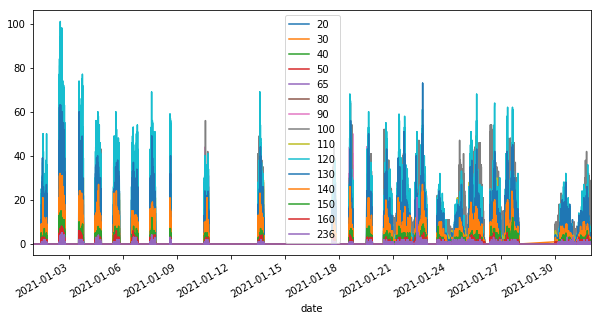

In [8]:
sensor_df.plot(figsize=(10,5));
plt.show()

In [9]:
sensor_agg= sensor_df['20 30 40 50 65 80 90 100 110 120 130 140 150 160 236'.split()].mean(axis=0).to_frame()
sensor_agg['std'] = sensor_df['20 30 40 50 65 80 90 100 110 120 130 140 150 160 236'.split()].std(axis=0)
sensor_agg.columns= 'mean std'.split()

In [10]:
sensor_agg

,mean,std
20,0.014998,0.358999
30,0.009307,0.236851
40,0.008343,0.203366
50,0.005787,0.137374
65,0.009934,0.201508
80,0.122830,0.658170
90,1.397232,4.338949
100,2.442853,6.509648
110,1.847656,4.844053
120,3.174865,9.031899


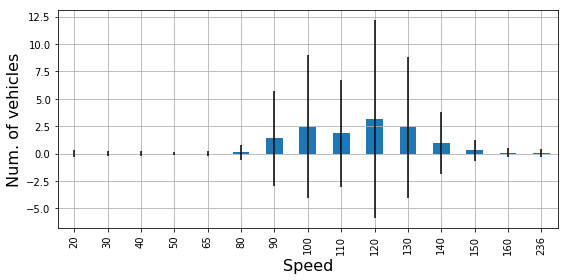

In [11]:
ax=sensor_agg.plot(kind='bar', grid=True, yerr='std', figsize=(8,4), legend=False)
ax.set_xlabel('Speed', fontsize=16)
ax.set_ylabel('Num. of vehicles', fontsize=16)

plt.tight_layout()
plt.show()

In [12]:
sensor_df.to_csv(os.path.join('datasets', 'sensor','raw_sensor_data.csv'))

In [13]:
sensor_bydate= sensor_df.groupby(['date']).sum()
sensor_bydate.head()

,20,30,40,50,65,80,90,100,110,120,130,140,150,160,236
date,,,,,,,,,,,,,,,
2021-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
sensor_bydate= sensor_bydate.sum(axis=1).to_frame()
sensor_bydate.columns = ['total']
sensor_bydate

,total
date,
2021-01-01 00:15:00,0.0
2021-01-01 00:30:00,0.0
2021-01-01 00:45:00,0.0
2021-01-01 01:00:00,0.0
2021-01-01 01:15:00,0.0
2021-01-01 01:30:00,0.0
2021-01-01 01:45:00,0.0
2021-01-01 02:00:00,0.0
2021-01-01 02:15:00,0.0


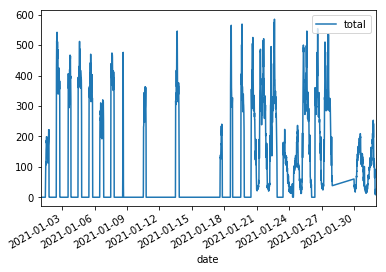

In [15]:
sensor_bydate.plot()
plt.show()

In [16]:
dates_w_trips= sensor_bydate[sensor_bydate['total']>0].index
dates_w_trips

DatetimeIndex(['2021-01-01 10:45:00', '2021-01-01 11:00:00',
               '2021-01-01 11:15:00', '2021-01-01 11:30:00',
               '2021-01-01 11:45:00', '2021-01-01 12:00:00',
               '2021-01-01 12:15:00', '2021-01-01 12:30:00',
               '2021-01-01 12:45:00', '2021-01-01 13:00:00',
               ...
               '2021-01-31 21:45:00', '2021-01-31 22:00:00',
               '2021-01-31 22:15:00', '2021-01-31 22:30:00',
               '2021-01-31 22:45:00', '2021-01-31 23:00:00',
               '2021-01-31 23:15:00', '2021-01-31 23:30:00',
               '2021-01-31 23:45:00', '2021-02-01 00:00:00'],
              dtype='datetime64[ns]', name='date', length=1184, freq=None)

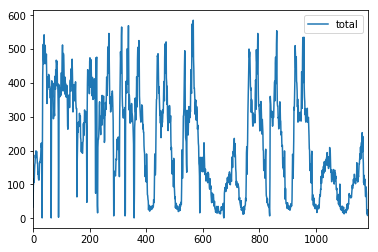

In [17]:
sensor_bydate[sensor_bydate['total']>0].reset_index(drop=True).plot()
plt.show()

In [18]:
sensor_bydate[sensor_bydate['total']>0].shape

(1184, 1)

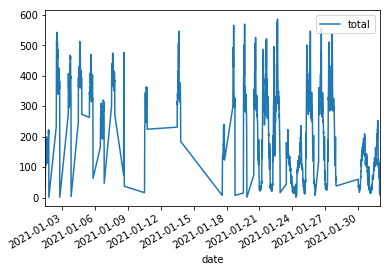

In [19]:
sensor_bydate[sensor_bydate['total']>0].plot()
plt.show()

In [20]:
sensor_df.loc[dates_w_trips]

,lane,veh_type,aux,20,30,40,50,65,80,90,100,110,120,130,140,150,160,236,roadway
date,,,,,,,,,,,,,,,,,,,
2021-01-01 10:45:00,01,01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,4.0,2.0,0.0,1.0,0.0,0.0,r1
2021-01-01 10:45:00,01,02,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,r1
2021-01-01 10:45:00,02,01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,r1
2021-01-01 10:45:00,02,02,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,r1
2021-01-01 10:45:00,03,01,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,7.0,3.0,2.0,1.0,0.0,0.0,r2
2021-01-01 10:45:00,03,02,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,r2
2021-01-01 10:45:00,04,01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,r2
2021-01-01 10:45:00,04,02,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,r2
2021-01-01 11:00:00,04,02,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,r2


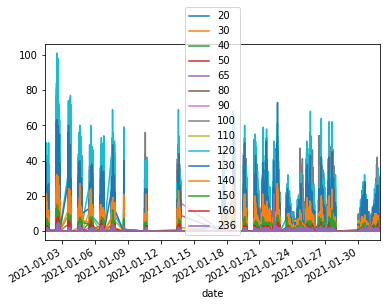

In [21]:
sensor_df.loc[dates_w_trips].plot()
plt.show()

In [22]:
print("That's all folks")

That's all folks
